In [8]:
import mglearn
import sklearn
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

## 이진 분류용 선형 모델

- 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교
- 계산한 값이 0보다 작으면 클래스를 -1, 0보다 크면 +1이라고 예측
- 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기

- 가장 널리 알려진 알고리즘은 로지스틱 회귀와 서포트 벡터 머신이 있다.


c:\Users\dbswo\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


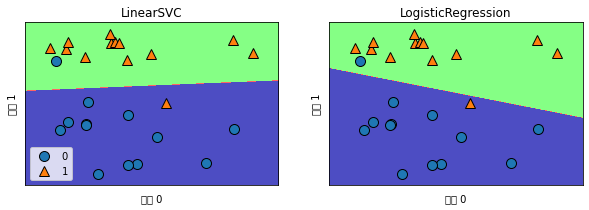

In [6]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_classification(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

axes[0].legend()

- 각 모델로 만든 결정 경계가 직선으로 표현되었고 직선에 따라 클래스를 0, 1로 분류된다.

- 기본적으로 Ridge와 마찬가지로 L2규제를 사용
- 규제의 강도를 결정하는 매개변수는 C이다. 높은 C값은 훈련 세트에 모델이 최대한 맞추려 하고, 낮은 C값은 계수 벡터(w)가 0에 가까워지도록 한다.
- C값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하고, C값을 높이면 데이터 포인트를 정확히 분류하려고 노력한다고 설명할 수도 있다.

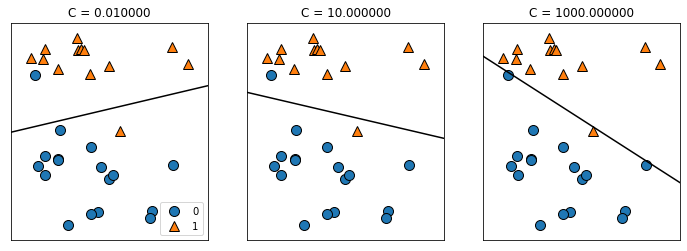

In [7]:
mglearn.plots.plot_linear_svc_regularization()

- 왼쪽 그림은 작은 C값으로 규제가 많이 적용되었고 비교정 수평에 가까운 결정경계를 보이고 있다.
- 중간 그림은 C값이 조금 더 크고 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어졌다.
- 오른쪽 그림은 C값을 크게하여 결정 경계가 더 기울었고 모든 데이터 포인트를 올바르게 분류하였다.
- 하지만 오른쪽 그림은 모든 데이터 포인트를 정확하게 분류하려 했지만 클래스의 전체적인 배치를 잘 파악하지 못했다. 다시 말해 과대적합되었다.

- 낮은 차원에서는 결정 경계가 직선이거나 평면이어서 제한적으로 보이지만 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 특성이 많아질 때 과대적합을 방지하는 것이 매우 중요하다.

In [9]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)

print(f'훈련 세트 점수 : {logreg.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {logreg.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.96


- 훈련 세트와 테스트 세트 모두 성능이 준수하지만 비슷한 성능을 보이므로 과소적합으로 보인다.

In [10]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)

print(f'훈련 세트 점수 : {logreg100.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {logreg100.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.98
테스트 세트 점수 : 0.97


- C=100에서 훈련 세트의 정확도가 증가했고 테스트 세트의 정확도도 약간 증가했다.

- 복잡도가 높은 모델일수록 성능이 좋음을 알 수 있다.

In [12]:
logreg001 = LogisticRegression(C=0.001, max_iter=5000).fit(X_train, y_train)

print(f'훈련 세트 점수 : {logreg001.score(X_train, y_train):.2f}')
print(f'테스트 세트 점수 : {logreg001.score(X_test, y_test):.2f}')

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.94


c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dbswo\min

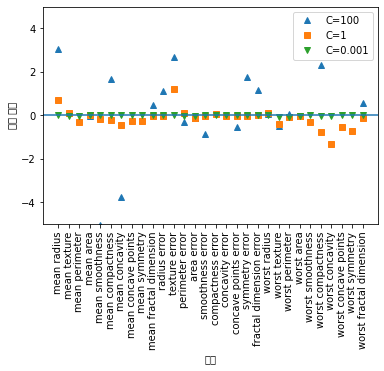

In [13]:
plt.plot(logreg100.coef_.T, "^", label='C=100')
plt.plot(logreg.coef_.T, "s", label='C=1')
plt.plot(logreg001.coef_.T, "v", label='C=0.001')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

- mean perimeter를 보면 C=100, C=1일 때 계수는 음수지만 C=0.001일 때는 양수가 되며 C=1보다도 절댓값이 크다.

- 이와 같은 모델을 해석하면 계수가 클래스와 특성의 연관성을 알려줄 수 있다.
- 예를 들면 texture error특성은 악성인 샘플과 관련이 깊고 mean perimeter특성은 계수의 부호가 바뀌는 것으로 보아 양성, 악성 신호 모두가 될 수 있다.
- 항상 선형 모델의 계수는 의심하고 조심해서 해석할 필요가 있다.